In [1]:
import pandas as pd
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [2]:
edges = [tuple(x) for x in data.values.tolist()]

In [3]:
a=data["user_id"].values
b=data["item_id"].values
c=data["rating"].values

In [4]:
from scipy.sparse import coo_matrix
matrix=coo_matrix((c,(a,b)))

In [5]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(matrix, 
                              n_components=3,
                              n_iter=5,
                              random_state=None)

In [6]:
total_rating=0
for i in (data['rating'].values):
    total_rating=total_rating+i
mean=total_rating/len(data)
print(mean)

3.529480398257623


In [7]:
import numpy as np
unique=data["user_id"].unique()
bi=np.zeros([len(unique),1])

    

In [8]:
import numpy as np
unique=data["item_id"].unique()
cj=np.zeros([len(unique),1])

    

In [9]:
cj=list(cj)
bi=list(bi)
U=list(U)
VT=list(VT.T)

In [10]:
user=[]
movie=[]
for i in edges:
    if i[0] not in user:
        user.append(i[0])
    if i[1] not in movie:
        movie.append(i[1])

In [84]:
alpha=0.01
r=0.01
for i in range(10):
    mse=[]
    for j in edges:
        #print(j[0],j[1])
        b=bi[user.index(j[0])]
        c=cj[movie.index(j[1])]
        yij=j[2]
        Ui=U[j[0]]
        VTj=VT[j[1]]
        db=2*alpha*b-2*(yij-mean-c-b-Ui.dot(VTj.T))
        dc=2*alpha*c-2*(yij-mean-c-b-Ui.dot(VTj.T))
        b=b-r*db
        c=c-r*dc 
        bi[user.index(j[0])]=b
        cj[movie.index(j[1])]=c
    for k in edges:
        b=bi[user.index(k[0])]
        c=cj[movie.index(k[1])]
        yij=k[2]
        Ui=U[k[0]]
        VTj=VT[k[1]]
        pred=(mean+c+b+Ui.dot(VTj.T))
        error=yij-pred
        mse.append(error*error)
    print(sum(mse)/len(mse))
    

    

        
    

[0.88927167]
[0.86295576]
[0.8534746]
[0.84894512]
[0.84641048]
[0.84482868]
[0.8437581]
[0.84298717]
[0.84240481]
[0.84194826]


# Task2

In [87]:
data1 = pd.read_csv('user_info.csv.txt')


In [96]:
data2=(pd.merge(data1, data, on='user_id'))

In [109]:
x1=data2.loc[data2['rating']==1]
x2=data2.loc[data2['rating']==2]
x3=data2.loc[data2['rating']==3]
x4=data2.loc[data2['rating']==4]
x5=data2.loc[data2['rating']==5]


[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA65DE29B0>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA65D40E80>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA656F6630>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA660DC8D0>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA62BF7D68>]]


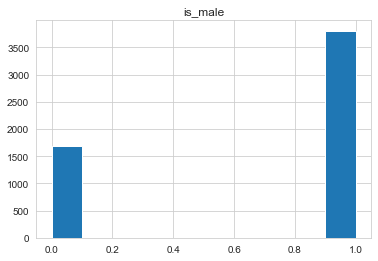

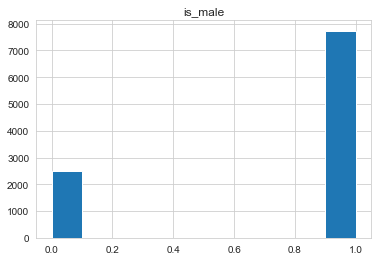

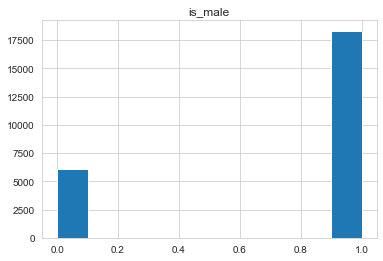

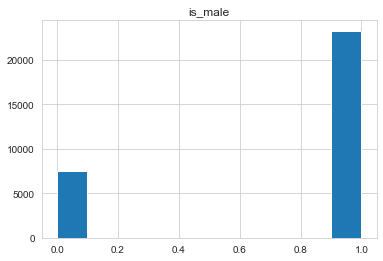

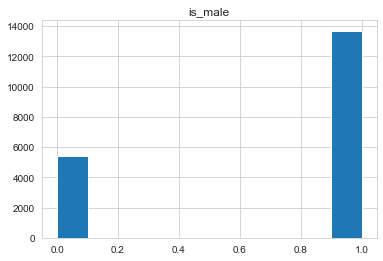

In [115]:
d1=x1.hist("is_male")
d2=x2.hist("is_male")
d3=x3.hist("is_male")
d4=x4.hist("is_male")
d5=x5.hist("is_male")
print(d1,d2,d3,d4,d5)



### Observation

1) Our dataset has nothing to do with the gender in predicting the ratings for a movie it can be interfered from the above pllotted histograms.